# Homework3
**Name: Nurtas Ilyas**

In [1]:
import torch

# What is Pytorch?

# Task 1

1. Make a tensor of size (2, 17)
2. Make a torch.FloatTensor of size (3, 1)
3. Make a torch.LongTensor of size (5, 2, 1)
  - fill the entire tensor with 7s
4. Make a torch.ByteTensor of size (5,)
  - fill the middle 3 indices with ones such that it records [0, 1, 1, 1, 0]

In [2]:
x1 = torch.Tensor(2,17)
print(x1.shape)

torch.Size([2, 17])


In [3]:
x2 = torch.FloatTensor(3,1)
print(x2.shape)

torch.Size([3, 1])


In [4]:
x3 = torch.LongTensor(5, 2, 1)
x3[::] = 7
print(x3)

tensor([[[7],
         [7]],

        [[7],
         [7]],

        [[7],
         [7]],

        [[7],
         [7]],

        [[7],
         [7]]])


In [5]:
x4 = torch.ByteTensor(5)
x4[:] = 0
x4[1:4] = 1
print(x4)

tensor([0, 1, 1, 1, 0], dtype=torch.uint8)


# Task 2

1. multiply of two tensors (see [torch.Tensor.mul](http://pytorch.org/docs/master/tensors.html#torch.Tensor.mul))
2. do the same, but inplace
3. division of two tensors (see [torch.Tensor.div](http://pytorch.org/docs/master/tensors.html#torch.Tensor.div))
4. perform a matrix multiplication of two tensors of size (2, 4) and (4, 2)

In [6]:
x = torch.rand(3, 3)
y = torch.rand(3, 3)
print(x,'\n', y)

tensor([[0.1463, 0.7386, 0.5348],
        [0.1461, 0.6381, 0.9664],
        [0.4097, 0.5562, 0.6348]]) 
 tensor([[0.7296, 0.2229, 0.8062],
        [0.3753, 0.9611, 0.4980],
        [0.7381, 0.1051, 0.1668]])


In [7]:
print(torch.mul(x,y))
print(x * y)

tensor([[0.1067, 0.1647, 0.4312],
        [0.0548, 0.6133, 0.4812],
        [0.3024, 0.0585, 0.1059]])
tensor([[0.1067, 0.1647, 0.4312],
        [0.0548, 0.6133, 0.4812],
        [0.3024, 0.0585, 0.1059]])


In [8]:
x.mul_(y)
print(x)

tensor([[0.1067, 0.1647, 0.4312],
        [0.0548, 0.6133, 0.4812],
        [0.3024, 0.0585, 0.1059]])


In [9]:
print(x / y)
print(torch.div(x, y))

tensor([[0.1463, 0.7386, 0.5348],
        [0.1461, 0.6381, 0.9664],
        [0.4097, 0.5562, 0.6348]])
tensor([[0.1463, 0.7386, 0.5348],
        [0.1461, 0.6381, 0.9664],
        [0.4097, 0.5562, 0.6348]])


In [10]:
x = torch.rand(2, 4)
y = torch.rand(4, 2)
print(x, '\n', y)

tensor([[0.5719, 0.0165, 0.8578, 0.0412],
        [0.2788, 0.7177, 0.8285, 0.8254]]) 
 tensor([[0.5955, 0.5947],
        [0.2470, 0.7327],
        [0.7173, 0.1754],
        [0.3967, 0.0233]])


In [11]:
print(x @ y)
print(torch.matmul(x, y))

tensor([[0.9763, 0.5036],
        [1.2651, 0.8562]])
tensor([[0.9763, 0.5036],
        [1.2651, 0.8562]])


# Task3

1. create a tensor of size (5, 2) containing ones
2. now convert it to a numpy array
3. now convert it back to a torch tensor

In [12]:
x = torch.ones(5, 2)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


In [13]:
x = x.numpy()
print(x)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [14]:
x = torch.from_numpy(x)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


# Automatic Differentiation

# Task 1

1. Define a tensor
2. Convert the tensor to a torch.Variable that requires_grad
3. Multiply the torch.Variable with 2 and assign the result to a new python variable (i.e. `x = result`)
4. Sum the variable's elements and assign to a new python variable
5. Print the gradients of all the variables
6. Now perform a backward pass on the last variable
7. Print all gradients again
  - what did you notice?

In [15]:
from torch.autograd import Variable

In [16]:
x = torch.rand(5, 3)
print(x)

tensor([[0.9334, 0.5818, 0.9783],
        [0.3274, 0.9780, 0.5489],
        [0.4123, 0.1398, 0.2425],
        [0.7076, 0.5577, 0.9833],
        [0.9817, 0.6036, 0.6378]])


In [17]:
x = Variable(x, requires_grad = True)
print(x)

tensor([[0.9334, 0.5818, 0.9783],
        [0.3274, 0.9780, 0.5489],
        [0.4123, 0.1398, 0.2425],
        [0.7076, 0.5577, 0.9833],
        [0.9817, 0.6036, 0.6378]], requires_grad=True)


In [18]:
result = x * 2
print(result)

tensor([[1.8668, 1.1636, 1.9566],
        [0.6549, 1.9559, 1.0978],
        [0.8246, 0.2796, 0.4850],
        [1.4151, 1.1155, 1.9665],
        [1.9635, 1.2072, 1.2756]], grad_fn=<MulBackward0>)


In [19]:
matsum = result.sum()
print(matsum)

tensor(19.2282, grad_fn=<SumBackward0>)


In [20]:
print(x.grad)
print(result.grad)
print(matsum.grad)

None
None
None


In [21]:
matsum.backward()

In [22]:
print(x.grad) # gradient is computed only after .backward()
print(result.grad)
print(matsum.grad)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
None
None


# Feed Forward Neural Networks - Half-Moon

# Assignments

1. A linear logistic classifier is only able to create a linear decision boundary. Change the Logistic classifier into a (nonlinear) Neural network by inserting a dense hidden layer between the input and output layers of the model
 
2. Experiment with multiple hidden layers or more / less hidden units. What happens to the decision boundary?
 
3. Overfitting: When increasing the number of hidden layers / units the neural network will fit the training data better by creating a highly nonlinear decision boundary. If the model is to complex it will often generalize poorly to new data (validation and test set). Can you observe this from the training and validation errors? 
 
4. We used the vanilla stocastic gradient descent algorithm for parameter updates. This is usually slow to converge and more sophisticated pseudo-second-order methods usually works better. Try changing the optimizer to [adam or momentum](http://pytorch.org/docs/master/optim.html#torch.optim.Adam)

In [23]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# Do not worry about the code below for now, it is used for plotting later
def plot_decision_boundary(pred_func, X, y):
    #from https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    yy = yy.astype('float32')
    xx = xx.astype('float32')
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])[:,0]
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=-y, cmap=plt.cm.Spectral)

In [24]:
def onehot(t, num_classes):    
    out = np.zeros((t.shape[0], num_classes))    
    for row, col in enumerate(t):
        out[row, col] = 1
    return out

# Problem 
We'll initally demonstrate the that Multi-layer Perceptrons (MLPs) can classify nonlinear problems, whereas simple logistic regression cannot.
For ease of visualization and computationl speed we initially experiment on the simple 2D half-moon dataset, visualized below.

In [25]:
# Generate a dataset and plot it
np.random.seed(0)
num_samples = 300

X, y = sklearn.datasets.make_moons(num_samples, noise=0.20)

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [26]:
# define train, validation, and test sets
X_tr = X[:100].astype('float32')
print('Train set:', X_tr.shape)

X_val = X[100:200].astype('float32')
print('Validation set:', X_val.shape)

X_te = X[200:].astype('float32')
print('Test set:', X_te.shape)

Train set: (100, 2)
Validation set: (100, 2)
Test set: (100, 2)


In [27]:
# and labels
y_tr = y[:100].astype('int32')
y_val = y[100:200].astype('int32')
y_te = y[200:].astype('int32')

(300, 2) (300,)
Number of features:>> 2
Number of outputs:>> 2


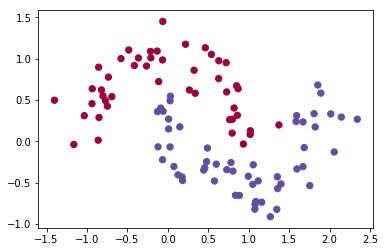

In [28]:
plt.scatter(X_tr[:,0], X_tr[:,1], s=40, c=y_tr, cmap=plt.cm.Spectral)
print(X.shape, y.shape)

num_features = X_tr.shape[-1]
print('Number of features:>>', num_features)

num_output = 2
print('Number of outputs:>>', num_output)

# From Logistic Regression to "Deep Learning"
The code implements logistic regression. In section [__Assignments Half Moon__](#Assignments-Half-Moon) (bottom of this notebook) you are asked to modify the code into a neural network.

The standard building block for neural networks are layers.
The simplest of which is called a `dense feed forward layer`, and it is computed as follows:

$$y = \mathrm{nonlinearity}(xW + b)$$

where $x$ is the input vector, $y$ is the output vector, and $W, b$ are the weights (a matrix and vector respectively).
The *dense* part of the name comes from the fact that every element of $x$ contributes to every element of $y$.
And the *feed forward* part of the name means that the layer processes each input independently. 
If we were to draw the layer it would be acyclical.
Later we will se layers that break both of these conventions.

- $x$ has shape `[batch_size, num_features]`,
- $W$ has shape `[num_features, num_units]`,
- $b$ has `[num_units]`, and
- $y$ has then `[batch_size, num_units]`

## PyTorch 101

In this first exercise we will use basic PyTorch functions so that you can learn how to build it from scratch. This will help you later if you want to build your own custom operations.

In [29]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter # A kind of Tensor that is to be considered a module parameter.

import torch.nn as nn # Base class for all neural network modules.
import torch.nn.functional as F # Functional interface  

[`Parameters`](http://pytorch.org/docs/0.1.12/nn.html#torch.nn.Parameter) are [`Variable`](http://pytorch.org/docs/0.1.12/autograd.html#torch.autograd.Variable) subclasses, that have a very special property when used with [`Module`](http://pytorch.org/docs/0.1.12/nn.html#torch.nn.Module)'s - when they’re assigned as `Module` attributes they are automatically added to the list of its parameters, and will appear e.g. in [`.parameters()`](http://pytorch.org/docs/0.1.12/nn.html#torch.nn.Module.parameters) iterator.
Assigning a Variable doesn’t have such effect.
This is because one might want to cache some temporary state (more on this later) in the model.
If there was no such class as `Parameter`, these temporaries would get registered too.

#### nn.Linear(in_features, out_features, bias=True)
#### Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to False, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(N, *, in\_features)` where :math:`*` means any number of
      additional dimensions
    - Output: :math:`(N, *, out\_features)` where all but the last dimension
      are the same shape as the input.

Attributes:
    weight: the learnable weights of the module of shape
        `(out_features x in_features)`
    bias:   the learnable bias of the module of shape `(out_features)`

Examples::

    >>> m = nn.Linear(20, 30)
    >>> input = torch.randn(128, 20)
    >>> output = m(input)
    >>> print(output.size())

In [30]:
class Net(nn.Module):
    
    def __init__(self):                 
        super(Net, self).__init__()       
        
        """
        Setting up variables, these variables are weights in your  network that can be updated while running our graph.        
        Notice, to make a hidden layer, the weights need to have the following dimensionality:      
                
        W_1[out_features x in_features]
        b_1[out_features]
        
        in the example below we have 2 input units (number of input features) and 2 output units (output features)
        so our weights become W[2, 2], b[2]; if we want to make a hidden layer with 100 units, we need to define the shape of the
        first weight to: W[100, 2], b[100];  and the shape of the second weight to         
        W[2, 100], b[2]                
        """        
        # first layer
        
        self.W_1 = Parameter(torch.randn(100, num_features)) 
        self.b_1 = Parameter(torch.randn(100))
                        
        # second layer (to be completed as an exercise)        
        # NB when you create a second layer, remember that you also must change parts of the first layer
        # number of features of the pervious layer will be equal to the number of output of the current 
        # layer 
        
        
        self.W_2 = Parameter(torch.randn(num_output, 100))
        self.b_2 = Parameter(torch.randn(num_output))
        
#         self.W_3 = Parameter(torch.randn(num_output, 100))
#         self.b_3 = Parameter(torch.randn(num_output))
        
        # self.W_2 = Parameter(torch.randn(num_features, num_output)) 
        # self.b_2 = self.b_1 = Parameter(torch.randn(num_features))
        
        
        """
        # thirs layer
        self.W_3 = Parameter(torch.randn(num_output, num_features)) 
        self.b_3 = Parameter(torch.randn(num_output))       
        """                 
        
    def forward(self, x):
        # method of the class 
        
        # Setting up ops, these ops will define edges along our computational graph
        # The below ops will compute a logistic regression, 
        # but can be modified to compute a neural network        
        
        # Applies a linear transformation to the incoming data: :math:`y = xW^T + b` 
        x = F.linear(x, self.W_1, self.b_1)
        
        # second layer (to be completed as an exercise)
        # NB when you create a second layer, remember that you also must change parts of the first layer
        x = F.linear(x, self.W_2, self.b_2)        
#         x = F.linear(x, self.W_3, self.b_3)
        # softmax to be performed on the second dimension (first dimension is >>> dim = 0)
        # x = [batch, features]
        
        return F.softmax(x, dim = 1)    

In [31]:
net = Net()
print(net)

Net()


Knowing how to print your tensors is useful

In [32]:
# list all parameters in your network
print("NAMED PARAMETERS")
print(list(net.named_parameters()))

NAMED PARAMETERS
[('W_1', Parameter containing:
tensor([[-0.0784, -1.2031],
        [ 0.1525,  0.9879],
        [ 0.6491,  0.3351],
        [ 0.5113,  1.3033],
        [ 0.0556, -0.5004],
        [ 0.5291,  0.6932],
        [ 2.1180,  1.0976],
        [-0.4323, -0.0066],
        [-0.2301,  0.9621],
        [ 0.9803, -0.5567],
        [ 1.2946, -1.4233],
        [-0.3296, -0.2798],
        [-0.9788,  1.1864],
        [-1.7977,  1.8504],
        [ 0.6607,  0.3893],
        [ 0.4937, -0.8170],
        [ 0.8377, -0.1868],
        [ 0.5024,  1.3425],
        [ 1.0199,  0.4054],
        [ 0.8917, -1.0693],
        [-2.0051, -0.0111],
        [-0.1661,  0.7977],
        [ 0.2525, -1.3193],
        [ 0.6006,  0.7178],
        [ 0.7385, -0.5919],
        [-0.2418,  0.9406],
        [ 0.4869,  0.5162],
        [-0.5975, -0.9173],
        [ 0.1413, -1.9736],
        [ 0.0772, -0.4034],
        [ 0.5221, -0.1828],
        [-0.7151,  1.7487],
        [-1.5330, -1.0936],
        [-2.5156, -0.3262],


In [33]:
# the parameters() method simply gives the Tensors in the list
print("PARAMETERS")
print(list(net.parameters()))
print()

PARAMETERS
[Parameter containing:
tensor([[-0.0784, -1.2031],
        [ 0.1525,  0.9879],
        [ 0.6491,  0.3351],
        [ 0.5113,  1.3033],
        [ 0.0556, -0.5004],
        [ 0.5291,  0.6932],
        [ 2.1180,  1.0976],
        [-0.4323, -0.0066],
        [-0.2301,  0.9621],
        [ 0.9803, -0.5567],
        [ 1.2946, -1.4233],
        [-0.3296, -0.2798],
        [-0.9788,  1.1864],
        [-1.7977,  1.8504],
        [ 0.6607,  0.3893],
        [ 0.4937, -0.8170],
        [ 0.8377, -0.1868],
        [ 0.5024,  1.3425],
        [ 1.0199,  0.4054],
        [ 0.8917, -1.0693],
        [-2.0051, -0.0111],
        [-0.1661,  0.7977],
        [ 0.2525, -1.3193],
        [ 0.6006,  0.7178],
        [ 0.7385, -0.5919],
        [-0.2418,  0.9406],
        [ 0.4869,  0.5162],
        [-0.5975, -0.9173],
        [ 0.1413, -1.9736],
        [ 0.0772, -0.4034],
        [ 0.5221, -0.1828],
        [-0.7151,  1.7487],
        [-1.5330, -1.0936],
        [-2.5156, -0.3262],
        [ 1.32

In [34]:
# list individual parameters by name
print('WEIGHTS')
print(net.W_1)
print(net.W_1.size())

WEIGHTS
Parameter containing:
tensor([[-0.0784, -1.2031],
        [ 0.1525,  0.9879],
        [ 0.6491,  0.3351],
        [ 0.5113,  1.3033],
        [ 0.0556, -0.5004],
        [ 0.5291,  0.6932],
        [ 2.1180,  1.0976],
        [-0.4323, -0.0066],
        [-0.2301,  0.9621],
        [ 0.9803, -0.5567],
        [ 1.2946, -1.4233],
        [-0.3296, -0.2798],
        [-0.9788,  1.1864],
        [-1.7977,  1.8504],
        [ 0.6607,  0.3893],
        [ 0.4937, -0.8170],
        [ 0.8377, -0.1868],
        [ 0.5024,  1.3425],
        [ 1.0199,  0.4054],
        [ 0.8917, -1.0693],
        [-2.0051, -0.0111],
        [-0.1661,  0.7977],
        [ 0.2525, -1.3193],
        [ 0.6006,  0.7178],
        [ 0.7385, -0.5919],
        [-0.2418,  0.9406],
        [ 0.4869,  0.5162],
        [-0.5975, -0.9173],
        [ 0.1413, -1.9736],
        [ 0.0772, -0.4034],
        [ 0.5221, -0.1828],
        [-0.7151,  1.7487],
        [-1.5330, -1.0936],
        [-2.5156, -0.3262],
        [ 1.3239, 

In [35]:
print('\nBIAS')
print(net.b_1)
print(net.b_1.size())


BIAS
Parameter containing:
tensor([-0.3402,  0.5683,  0.9096, -0.0650, -0.9924,  1.7086, -0.5039,  1.3444,
        -0.3882,  0.9107, -0.1112,  1.6990, -0.1424,  0.0954,  0.2827,  1.5819,
         0.7076, -2.1028, -0.5856,  2.0042, -0.8685, -0.8749, -1.5514, -0.8083,
        -2.0088,  1.0694,  1.5854, -1.8380, -0.7558, -0.0597,  1.1008, -0.3957,
         2.6330,  0.2814, -0.6434,  0.2322,  1.2764, -0.0853, -0.9325, -0.1588,
         0.3753,  1.0195,  1.5312,  1.6840, -1.6632, -1.4415, -0.4709,  0.7847,
        -0.4622, -0.3616,  0.8919, -1.7369,  0.6415, -0.2861,  0.2158,  0.8287,
         0.4909,  1.1094, -0.9257,  0.9872,  1.3234, -0.5521, -1.8246,  0.1994,
        -0.7337,  1.6200, -0.8317, -0.1494,  0.0258, -0.3861,  1.0252, -1.2845,
        -1.2638, -0.6382, -0.7946,  1.2496,  0.7119,  1.0370, -1.0400,  1.9675,
         0.1735, -0.9655,  0.7589, -0.0169, -0.4446, -0.6751, -0.6434,  0.3136,
         1.3441, -0.2144,  2.6338, -0.1705, -0.2087,  0.8999, -1.2635,  1.9225,
         1.1

# Exploring Parameter

Ok, let's investigate what a `Parameter`/`Variable` is

In [36]:
param = net.W_1
print(param)

Parameter containing:
tensor([[-0.0784, -1.2031],
        [ 0.1525,  0.9879],
        [ 0.6491,  0.3351],
        [ 0.5113,  1.3033],
        [ 0.0556, -0.5004],
        [ 0.5291,  0.6932],
        [ 2.1180,  1.0976],
        [-0.4323, -0.0066],
        [-0.2301,  0.9621],
        [ 0.9803, -0.5567],
        [ 1.2946, -1.4233],
        [-0.3296, -0.2798],
        [-0.9788,  1.1864],
        [-1.7977,  1.8504],
        [ 0.6607,  0.3893],
        [ 0.4937, -0.8170],
        [ 0.8377, -0.1868],
        [ 0.5024,  1.3425],
        [ 1.0199,  0.4054],
        [ 0.8917, -1.0693],
        [-2.0051, -0.0111],
        [-0.1661,  0.7977],
        [ 0.2525, -1.3193],
        [ 0.6006,  0.7178],
        [ 0.7385, -0.5919],
        [-0.2418,  0.9406],
        [ 0.4869,  0.5162],
        [-0.5975, -0.9173],
        [ 0.1413, -1.9736],
        [ 0.0772, -0.4034],
        [ 0.5221, -0.1828],
        [-0.7151,  1.7487],
        [-1.5330, -1.0936],
        [-2.5156, -0.3262],
        [ 1.3239,  0.0549]

In [37]:
print("## this is the tensor")
print(param.data)

print("\n## this is the tensor's gradient")
print(param.grad)
# notice, the gradient is undefined because we have not yet run a backward pass

print("\n## is it a leaf in the graph?")
print(param.is_leaf)

## this is the tensor
tensor([[-0.0784, -1.2031],
        [ 0.1525,  0.9879],
        [ 0.6491,  0.3351],
        [ 0.5113,  1.3033],
        [ 0.0556, -0.5004],
        [ 0.5291,  0.6932],
        [ 2.1180,  1.0976],
        [-0.4323, -0.0066],
        [-0.2301,  0.9621],
        [ 0.9803, -0.5567],
        [ 1.2946, -1.4233],
        [-0.3296, -0.2798],
        [-0.9788,  1.1864],
        [-1.7977,  1.8504],
        [ 0.6607,  0.3893],
        [ 0.4937, -0.8170],
        [ 0.8377, -0.1868],
        [ 0.5024,  1.3425],
        [ 1.0199,  0.4054],
        [ 0.8917, -1.0693],
        [-2.0051, -0.0111],
        [-0.1661,  0.7977],
        [ 0.2525, -1.3193],
        [ 0.6006,  0.7178],
        [ 0.7385, -0.5919],
        [-0.2418,  0.9406],
        [ 0.4869,  0.5162],
        [-0.5975, -0.9173],
        [ 0.1413, -1.9736],
        [ 0.0772, -0.4034],
        [ 0.5221, -0.1828],
        [-0.7151,  1.7487],
        [-1.5330, -1.0936],
        [-2.5156, -0.3262],
        [ 1.3239,  0.0549]

## Excluding subgraphs from backward propagation

`Variable`s have two properties which allow you to define if a graph is going to be used for training or inference, `requires_grad` and `volatile`.
During training we might not want to compute the gradients for all layers, e.g. if we have a pretrained model or embeddings that we do not want to change the values of.

To compute gradients we need to store activations and compute the backward pass for the given layer.
Setting `requires_grad = False` will allow you to circumvent these properties.
If any paramater in an operation / layer requires gradient then the entire output of the operation will also require gradient.

The `volatile` property is mostly used when you want to run inference with your model, and if it is set to `True` the entire graph will not require gradient. This means that you expect to never call `.backward()` on the network.

See http://pytorch.org/docs/master/notes/autograd.html for an in-depth explanation.

# Test network

To use our network we can simply call our graph, and it will dynamically be created. Here is an example of running the network's forward pass.

In [38]:
num_neurons = 5

X = Variable(torch.randn(num_neurons, num_features))
# the net.__call__ runs some pre-defined functions
# both before and after running net.forward()
# see http://pytorch.org/docs/master/_modules/torch/nn/modules/module.html

print('input')

print(X)

print(X.shape)

input
tensor([[-1.1783, -2.2129],
        [-1.0838,  0.6219],
        [-0.1571,  0.0981],
        [ 0.3444, -1.3741],
        [-1.1975, -0.1108]])
torch.Size([5, 2])


In [39]:
# pass through the NN
print('\noutput')
print(net(X))


output
tensor([[1.0000e+00, 4.8409e-12],
        [6.1311e-07, 1.0000e+00],
        [2.3271e-06, 1.0000e+00],
        [9.8809e-01, 1.1906e-02],
        [3.5746e-02, 9.6425e-01]], grad_fn=<SoftmaxBackward>)


------
## A softmax function.

Softmax is defined as:

$\text{Softmax}(x_{i}) = \frac{exp(x_i)}{\sum_j exp(x_j)}$

It is applied to all slices along dim, and will re-scale them so that the elements
lie in the range `(0, 1)` and sum to 1.

See :class:`~torch.nn.Softmax` for more details.

Arguments:
    input (Tensor): input
    dim (int): A dimension along which softmax will be computed.

.. note::
    This function doesn't work directly with NLLLoss,
    which expects the Log to be computed between the Softmax and itself.
    Use log_softmax instead (it's faster and has better numerical properties).
    


In [40]:
X

tensor([[-1.1783, -2.2129],
        [-1.0838,  0.6219],
        [-0.1571,  0.0981],
        [ 0.3444, -1.3741],
        [-1.1975, -0.1108]])

In [41]:
F.softmax(X, dim = 1) 

tensor([[0.7378, 0.2622],
        [0.1537, 0.8463],
        [0.4366, 0.5634],
        [0.8479, 0.1521],
        [0.2522, 0.7478]])

In [42]:
# is same as:  
net.forward(X)

tensor([[1.0000e+00, 4.8409e-12],
        [6.1311e-07, 1.0000e+00],
        [2.3271e-06, 1.0000e+00],
        [9.8809e-01, 1.1906e-02],
        [3.5746e-02, 9.6425e-01]], grad_fn=<SoftmaxBackward>)

In [43]:
print('\nWEIGHT')

param = net.W_1
print(param)

print('\nBIAS')
print(net.b_1)


WEIGHT
Parameter containing:
tensor([[-0.0784, -1.2031],
        [ 0.1525,  0.9879],
        [ 0.6491,  0.3351],
        [ 0.5113,  1.3033],
        [ 0.0556, -0.5004],
        [ 0.5291,  0.6932],
        [ 2.1180,  1.0976],
        [-0.4323, -0.0066],
        [-0.2301,  0.9621],
        [ 0.9803, -0.5567],
        [ 1.2946, -1.4233],
        [-0.3296, -0.2798],
        [-0.9788,  1.1864],
        [-1.7977,  1.8504],
        [ 0.6607,  0.3893],
        [ 0.4937, -0.8170],
        [ 0.8377, -0.1868],
        [ 0.5024,  1.3425],
        [ 1.0199,  0.4054],
        [ 0.8917, -1.0693],
        [-2.0051, -0.0111],
        [-0.1661,  0.7977],
        [ 0.2525, -1.3193],
        [ 0.6006,  0.7178],
        [ 0.7385, -0.5919],
        [-0.2418,  0.9406],
        [ 0.4869,  0.5162],
        [-0.5975, -0.9173],
        [ 0.1413, -1.9736],
        [ 0.0772, -0.4034],
        [ 0.5221, -0.1828],
        [-0.7151,  1.7487],
        [-1.5330, -1.0936],
        [-2.5156, -0.3262],
        [ 1.3239, 

Parameters is a special case of Variable 

In [44]:
# let's take a look at the gradients
for p in net.parameters():
    print('DATA >>>', p.data)
    print('GRADIENT >>>', p.grad)
    print()

DATA >>> tensor([[-0.0784, -1.2031],
        [ 0.1525,  0.9879],
        [ 0.6491,  0.3351],
        [ 0.5113,  1.3033],
        [ 0.0556, -0.5004],
        [ 0.5291,  0.6932],
        [ 2.1180,  1.0976],
        [-0.4323, -0.0066],
        [-0.2301,  0.9621],
        [ 0.9803, -0.5567],
        [ 1.2946, -1.4233],
        [-0.3296, -0.2798],
        [-0.9788,  1.1864],
        [-1.7977,  1.8504],
        [ 0.6607,  0.3893],
        [ 0.4937, -0.8170],
        [ 0.8377, -0.1868],
        [ 0.5024,  1.3425],
        [ 1.0199,  0.4054],
        [ 0.8917, -1.0693],
        [-2.0051, -0.0111],
        [-0.1661,  0.7977],
        [ 0.2525, -1.3193],
        [ 0.6006,  0.7178],
        [ 0.7385, -0.5919],
        [-0.2418,  0.9406],
        [ 0.4869,  0.5162],
        [-0.5975, -0.9173],
        [ 0.1413, -1.9736],
        [ 0.0772, -0.4034],
        [ 0.5221, -0.1828],
        [-0.7151,  1.7487],
        [-1.5330, -1.0936],
        [-2.5156, -0.3262],
        [ 1.3239,  0.0549],
        [ 0

In [45]:
X = Variable(torch.randn(7, num_features))
out = net(X)
print(out)

tensor([[6.3190e-14, 1.0000e+00],
        [1.9821e-01, 8.0179e-01],
        [1.0409e-09, 1.0000e+00],
        [1.3135e-02, 9.8686e-01],
        [9.9286e-01, 7.1404e-03],
        [3.7337e-14, 1.0000e+00],
        [9.9963e-01, 3.7101e-04]], grad_fn=<SoftmaxBackward>)


In [46]:
# we need to give a tensor of gradients to .backward,
# we give a dummy tensor
out.backward(torch.randn(7, num_features))

for details on `.backward()`, see http://pytorch.org/docs/master/autograd.html#torch.autograd.backward

In [47]:
# let's take a look at the gradients
for p in net.parameters():
    print('DATA >>>', p.data)
    print('GRADIENT >>>', p.grad)
    print()

DATA >>> tensor([[-0.0784, -1.2031],
        [ 0.1525,  0.9879],
        [ 0.6491,  0.3351],
        [ 0.5113,  1.3033],
        [ 0.0556, -0.5004],
        [ 0.5291,  0.6932],
        [ 2.1180,  1.0976],
        [-0.4323, -0.0066],
        [-0.2301,  0.9621],
        [ 0.9803, -0.5567],
        [ 1.2946, -1.4233],
        [-0.3296, -0.2798],
        [-0.9788,  1.1864],
        [-1.7977,  1.8504],
        [ 0.6607,  0.3893],
        [ 0.4937, -0.8170],
        [ 0.8377, -0.1868],
        [ 0.5024,  1.3425],
        [ 1.0199,  0.4054],
        [ 0.8917, -1.0693],
        [-2.0051, -0.0111],
        [-0.1661,  0.7977],
        [ 0.2525, -1.3193],
        [ 0.6006,  0.7178],
        [ 0.7385, -0.5919],
        [-0.2418,  0.9406],
        [ 0.4869,  0.5162],
        [-0.5975, -0.9173],
        [ 0.1413, -1.9736],
        [ 0.0772, -0.4034],
        [ 0.5221, -0.1828],
        [-0.7151,  1.7487],
        [-1.5330, -1.0936],
        [-2.5156, -0.3262],
        [ 1.3239,  0.0549],
        [ 0

In [48]:
# ok, let's try and zero the accumulated gradients
net.zero_grad()
for p in net.parameters():
    print('DATA >>>', p.data)
    print('GRADIENT >>>', p.grad)
    print()

DATA >>> tensor([[-0.0784, -1.2031],
        [ 0.1525,  0.9879],
        [ 0.6491,  0.3351],
        [ 0.5113,  1.3033],
        [ 0.0556, -0.5004],
        [ 0.5291,  0.6932],
        [ 2.1180,  1.0976],
        [-0.4323, -0.0066],
        [-0.2301,  0.9621],
        [ 0.9803, -0.5567],
        [ 1.2946, -1.4233],
        [-0.3296, -0.2798],
        [-0.9788,  1.1864],
        [-1.7977,  1.8504],
        [ 0.6607,  0.3893],
        [ 0.4937, -0.8170],
        [ 0.8377, -0.1868],
        [ 0.5024,  1.3425],
        [ 1.0199,  0.4054],
        [ 0.8917, -1.0693],
        [-2.0051, -0.0111],
        [-0.1661,  0.7977],
        [ 0.2525, -1.3193],
        [ 0.6006,  0.7178],
        [ 0.7385, -0.5919],
        [-0.2418,  0.9406],
        [ 0.4869,  0.5162],
        [-0.5975, -0.9173],
        [ 0.1413, -1.9736],
        [ 0.0772, -0.4034],
        [ 0.5221, -0.1828],
        [-0.7151,  1.7487],
        [-1.5330, -1.0936],
        [-2.5156, -0.3262],
        [ 1.3239,  0.0549],
        [ 0

# Loss function

Let's define a custom loss function to compute how good our graph is doing.

In [49]:
# ys - estimated >>> ts - target output 

def cross_entropy(ys, ts):      
    # computing cross entropy per sample
    cross_entropy = -torch.sum(ts * torch.log(ys), dim=1, keepdim=False)    
    
    # averaging over samples
    average = torch.mean(cross_entropy)    
    
    return average

To train our neural network we need to update the parameters in direction of the negative gradient w.r.t the cost function we defined earlier.
We can use [`torch.optim`](http://pytorch.org/docs/master/optim.html) to get the gradients with some update rule for all parameters in the network.

Heres a small animation of gradient descent: http://imgur.com/a/Hqolp, which also illustrates which challenges optimizers might face, e.g. saddle points.

In [50]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.0001)

Next, we make the prediction functions, such that we can get an accuracy measure over a batch

In [51]:
def accuracy(ys, ts):    
    # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
    correct_prediction = torch.eq(torch.max(ys, 1)[1], torch.max(ts, 1)[1])    
    # averaging the one-hot encoded vector
    return torch.mean(correct_prediction.float())

The next step is to utilize our `optimizer` repeatedly in order to optimize our weights `W_1` and `b_1` to make the best possible linear seperation of the half moon dataset.

In [52]:
# number of training passses
num_epochs = 1000
# store loss and accuracy for information
train_losses, val_losses, train_accs, val_accs = [], [], [], []
def pred(X):
    """ Compute graph's prediction and return numpy array    
    Parameters
    ----------
    X : numpy.ndarray    
    Returns
    -------
    numpy.ndarray
    """
    X = Variable(torch.from_numpy(X))
    
    # forward pass 
    y = net(X)    
    return y.data.numpy()

Text(0.5,1,'Untrained Classifier')

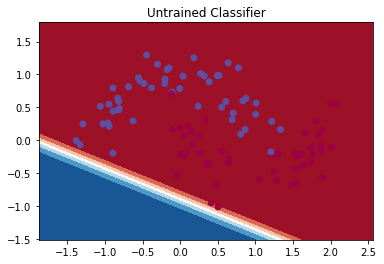

In [53]:
# plot boundary on testset before training session
plot_decision_boundary(lambda x: pred(x), X_te, y_te)
plt.title("Untrained Classifier")

In [54]:
# training loop

for e in range(num_epochs):
    # get training input and expected output as torch Variables and 
    # make sure type is correct
    
    tr_input = Variable(torch.from_numpy(X_tr))
    tr_targets = Variable(torch.from_numpy(onehot(y_tr, num_output))).float()
    
    # zeroize accumulated gradients in parameters
    optimizer.zero_grad()
    
    #+++++++++++ TRAIN STEP ++++++++++++++++
    # predict by running forward pass
    tr_output = net(tr_input)    
    
    # compute cross entropy loss
    tr_loss = cross_entropy(tr_output, tr_targets)    
   
    # compute gradients given loss
    tr_loss.backward()   
    
    # update the parameters given the computed gradients
    # Performs a single optimization step
    optimizer.step()
    
    train_acc = accuracy(tr_output, tr_targets)
    
    # store training loss
    train_losses.append(tr_loss.data.numpy())
    train_accs.append(train_acc)
    #+++++++++++++++++++++++++++++++++++++++
    """
    at each step/epoch USE the trained net() 
    to evaluate it on the validation set
    - Note however that the update is not happening
    after the validation step.
    
    tr_loss.backward() ->>> does the backprop 
    optimizer.step() ->>> does the weight update
    
    """
    
    #+++++++++++ VALIDATION STEP ++++++++++++++++
    # get validation input and expected output as torch Variables 
    # and make sure type is correct
    val_input = Variable(torch.from_numpy(X_val))
    val_targets = Variable(torch.from_numpy(onehot(y_val, num_output))).float()
    
    # predict with validation input
    val_output = net(val_input)
    
    # compute loss and accuracy
    val_loss = cross_entropy(val_output, val_targets)
    val_acc = accuracy(val_output, val_targets)
    
    # store loss and accuracy
    val_losses.append(val_loss.data.numpy())
    val_accs.append(val_acc.data.numpy())
    #+++++++++++++++++++++++++++++++++++++++
        
    if e % 100 == 0:
        print("Epoch %i, "
              "Train Cost: %0.3f"
              "\tVal Cost: %0.3f"
              "\t Val acc: %0.3f" % (e, 
                                     train_losses[-1],
                                     val_losses[-1],
                                     val_accs[-1]))        

Epoch 0, Train Cost: 9.900	Val Cost: 11.366	 Val acc: 0.480
Epoch 100, Train Cost: 8.051	Val Cost: 9.319	 Val acc: 0.480
Epoch 200, Train Cost: 6.234	Val Cost: 7.243	 Val acc: 0.490
Epoch 300, Train Cost: 4.451	Val Cost: 5.167	 Val acc: 0.470
Epoch 400, Train Cost: 2.833	Val Cost: 3.278	 Val acc: 0.460
Epoch 500, Train Cost: 1.583	Val Cost: 1.780	 Val acc: 0.470
Epoch 600, Train Cost: 0.829	Val Cost: 0.883	 Val acc: 0.480
Epoch 700, Train Cost: 0.529	Val Cost: 0.547	 Val acc: 0.640
Epoch 800, Train Cost: 0.416	Val Cost: 0.431	 Val acc: 0.750
Epoch 900, Train Cost: 0.365	Val Cost: 0.382	 Val acc: 0.790



Test Cost: 0.314	Test Accuracy: 0.850


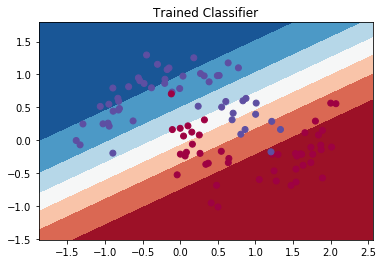

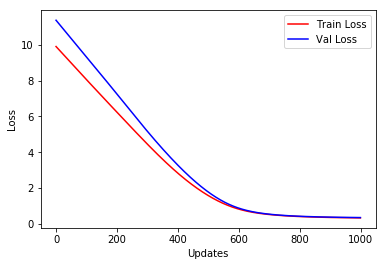

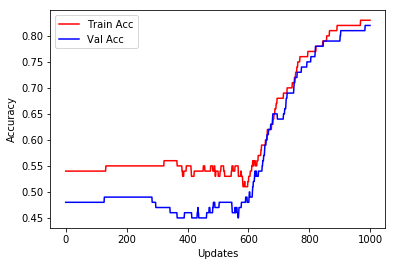

In [55]:
# get test input and expected output
te_input = Variable(torch.from_numpy(X_te))
te_targets = Variable(torch.from_numpy(onehot(y_te, num_output))).float()

# predict on testset
te_output = net(te_input)

# compute loss and accuracy
te_loss = cross_entropy(te_output, te_targets)
te_acc = accuracy(te_output, te_targets)
print("\nTest Cost: %0.3f\tTest Accuracy: %0.3f" % (te_loss.data.numpy(), te_acc.data.numpy()))

# plot boundary on testset after training session
plot_decision_boundary(lambda x: pred(x), X_te, y_te)
plt.title("Trained Classifier")

plt.figure()
epoch = np.arange(len(train_losses))
plt.plot(epoch, train_losses, 'r', label='Train Loss')
plt.plot(epoch, val_losses, 'b', label='Val Loss')
plt.legend()
plt.xlabel('Updates')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(epoch, train_accs, 'r', label='Train Acc')
plt.plot(epoch, val_accs, 'b', label='Val Acc')
plt.legend()
plt.xlabel('Updates')
plt.ylabel('Accuracy')
plt.show()

# Feed-Forward Neural Networks - MNIST

# Assignments

Try and add these modifications (might require some Googleing -- an important skill in deep learning):
- Kaiming He initialization instead of Xavier Glorot
- add an extra layer
- use the relu activation function
- add momentum to the optimizer
- use the ADAM optimizer instead of stochastic gradient descent

### Advanced - Regularization

Regularization is VERY important in practice and is used practically every time.
Many important results are completely dependent on cleaver use of regularization, and it is something you need to become familiar with if you want to work with deep learning.

- add L1 or L2 weight regularization (aka. weight decay) 
- add dropout to the network (**note** the `net.train()` and `net.eval()` are already in the code)
- add batchnorm

__Pointers on regularization hyperparameter:__
1. L2 and [L1 regularization](http://pytorch.org/docs/master/nn.html#torch.nn.L1Loss) (weight decay of optimization functions) 
  - Normal ranges: 1e-4  -  1e-8
1. [Dropout](http://pytorch.org/docs/master/nn.html?highlight=dropout#torch.nn.Dropout). Dropout rate 0.1-0.5
  - Remember to pick the correct version according to the input dimensionality
  - **NOTE** call `net.train()` before training to activate random dropout, and call `net.eval()` to deactivate dropout while validating or running inference with model.
1. [Batchnorm](http://pytorch.org/docs/master/nn.html#torch.nn.BatchNorm1d): Batchnorm also acts as a regularizer - Often very useful (faster and better convergence)
  - Remember to pick the correct version according to the input dimensionality
  - **NOTE** call `net.train()` before training to activate, and call `net.eval()` to have a non-stochastic variant while validating or running inference with model.
    

In [56]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# MNIST dataset
MNIST is a dataset that is often used for benchmarking. The MNIST dataset consists of 70,000 images of handwritten digits from 0-9. The dataset is split into a 50,000 images training set, 10,000 images validation set and 10,000 images test set. The images are 28x28 pixels, where each pixel represents a normalised value between 0-255 `(0=black and 255=white)`.

![MNIST.Exampel](../static_files/mnist.png)


## Primer
We use a feedforward neural network to classify the 28x28 mnist images. `num_features` is therefore $28 * 28=784$, i.e. we represent each image as a vector. The ordering of the pixels in the vector does not matter, so we could permutate all images using the same permutation and still get the same performance. (You are of course encouraged to try this using ``numpy.random.permutation`` to get a random permutation. This task is therefore called the _permutation invariant_ MNIST. Obviously this throws away a lot of structure in the data. In the next module we'll fix this with the convolutional neural network wich encodes prior knowledgde about data that has either spatial or temporal structure.  

## MNIST
First let's load the MNIST dataset and plot a few examples:

In [2]:
import wget

In [3]:
wget.download('https://github.com/maximai/placeholder_repo/raw/master/mnist.npz')

100% [........................................................................] 17069878 / 17069878

'mnist (1).npz'

In [57]:
#To speed up training we'll only work on a subset of the data
data = np.load('mnist.npz')
num_classes = 10

In [58]:
#To speed up training we'll only work on a subset of the data
x_train = data['X_train'][:1000].astype('float32')
targets_train = data['y_train'][:1000].astype('int32')

x_valid = data['X_valid'][:500].astype('float32')
targets_valid = data['y_valid'][:500].astype('int32')

x_test = data['X_test'][:500].astype('float32')
targets_test = data['y_test'][:500].astype('int32')

print("Information on dataset")
print("x_train", x_train.shape)
print("targets_train", targets_train.shape)
print("x_valid", x_valid.shape)
print("targets_valid", targets_valid.shape)
print("x_test", x_test.shape)
print("targets_test", targets_test.shape)

Information on dataset
x_train (1000, 784)
targets_train (1000,)
x_valid (500, 784)
targets_valid (500,)
x_test (500, 784)
targets_test (500,)


In [59]:
data

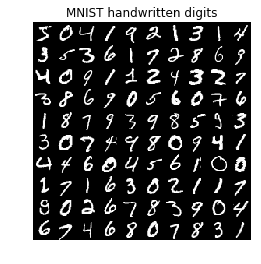

In [60]:
#plot a few MNIST examples
idx, dim, classes = 0, 28, 10
# create empty canvas
canvas = np.zeros((dim*classes, classes*dim))

# fill with tensors
for i in range(classes):
    for j in range(classes):
        canvas[i*dim:(i+1)*dim, j*dim:(j+1)*dim] = x_train[idx].reshape((dim, dim))
        idx += 1

# visualize matrix of tensors as gray scale image
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(canvas, cmap='gray')
plt.title('MNIST handwritten digits')
plt.show()

## Model

One of the large challenges in deep learning is the amount of hyperparameters that needs to be selected, and the lack of a good principled way of selecting them.
Hyperparameters can be found by experience (guessing) or some search procedure (often quite slow).
Random search is easy to implement and performs decent: http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf . 
More advanced search procedures include [Spearmint](https://github.com/JasperSnoek/spearmint) and many others.

**In practice a lot of trial and error is almost always involved.** This can be frustrating and time consuming, but the best thing to do is to think as a scientist, and go about it in a ordered manner --> monitor as much as you can, take notes, and be deliberate!

Below are some guidelines that you can use as a starting point to some of the most important hyperparameters. 
(*regularization* is also very important, but will be covered later.)


### Ballpark estimates of hyperparameters
__Number of hidden units and network structure:__
You'll have to experiment. One rarely goes below 512 units for feedforward networks (unless your are training on CPU...).
There's some research into stochastic depth networks: https://arxiv.org/pdf/1603.09382v2.pdf, but in general this is trial and error.

__Parameter initialization:__
Parameter initialization is extremely important.
PyTorch has a lot of different initializers, check the [PyTorch API](http://pytorch.org/docs/master/nn.html#torch-nn-init). Often used initializer are
1. Kaming He
2. Xavier Glorot
3. Uniform or Normal with small scale (0.1 - 0.01)
4. Orthogonal (this usually works very well for RNNs)

Bias is nearly always initialized to zero using the [torch.nn.init.constant(tensor, val)](http://pytorch.org/docs/master/nn.html#torch.nn.init.constant)

__Mini-batch size:__
Usually people use 16-256. Bigger is not allways better. With smaller mini-batch size you get more updates and your model might converge faster. Also small batch sizes use less memory, which means you can train a model with more parameters.

__Nonlinearity:__ [The most commonly used nonliearities are](http://pytorch.org/docs/master/nn.html#non-linear-activations)
1. ReLU
2. Leaky ReLU
3. Elu
3. Sigmoid squash the output [0, 1], and are used if your output is binary (not used in the hidden layers)
4. Tanh is similar to sigmoid, but squashes in [-1, 1]. It is rarely used any more.
4. Softmax normalizes the the output to 1, and is used as output if you have a classification problem

See the plot below.

__Optimizer and learning rate:__
1. SGD + Momentum: learning rate 1.0 - 0.1 
2. ADAM: learning rate 3*1e-4 - 1e-5
3. RMSPROP: somewhere between SGD and ADAM


softmax should sum to one (approxiamtely): 1.0


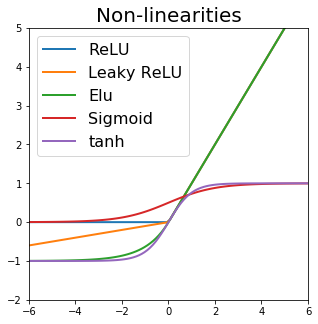

In [61]:
# Illustrate different output units
x = np.linspace(-6, 6, 100)
units = {
    "ReLU": lambda x: np.maximum(0, x),
    "Leaky ReLU": lambda x: np.maximum(0, x) + 0.1 * np.minimum(0, x),
    "Elu": lambda x: (x > 0) * x + (1 - (x > 0)) * (np.exp(x) - 1),
    "Sigmoid": lambda x: (1 + np.exp(-x))**(-1),
    "tanh": lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
}

plt.figure(figsize=(5, 5))
[plt.plot(x, unit(x), label=unit_name, lw=2) for unit_name, unit in units.items()]
plt.legend(loc=2, fontsize=16)
plt.title('Non-linearities', fontsize=20)
plt.ylim([-2, 5])
plt.xlim([-6, 6])

# assert that all class probablities sum to one
softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
print("softmax should sum to one (approxiamtely):", np.sum(softmax(x)))

In [62]:
#Hyperparameters
num_classes = 10
num_l1 = 512
num_features = x_train.shape[1]

# define network
class Net(nn.Module):

    def __init__(self, num_features, num_hidden, num_output):
        super(Net, self).__init__()  
        # input layer
        self.W_1 = Parameter(init.kaiming_normal_(torch.Tensor(num_hidden, num_features)))
        self.b_1 = Parameter(init.constant_(torch.Tensor(num_hidden), 0))
        # hidden layer
        self.W_1_bn = nn.BatchNorm1d(num_hidden)
        
        self.W_2 = Parameter(init.kaiming_normal_(torch.Tensor(num_hidden, num_hidden)))
        self.b_2 = Parameter(init.constant_(torch.Tensor(num_hidden), 0))
        
        self.W_2_bn = nn.BatchNorm1d(num_hidden)
        
        self.W_3 = Parameter(init.kaiming_normal_(torch.Tensor(num_output, num_hidden)))
        self.b_3 = Parameter(init.constant_(torch.Tensor(num_output), 0))
        
        self.dropout = nn.Dropout(0.3)
        # define activation function in constructor
        self.activation = torch.nn.ReLU()

    def forward(self, x):
        x = self.W_1_bn(F.linear(x, self.W_1, self.b_1))
        x = self.activation(x)
        x = self.W_2_bn(F.linear(x, self.W_2, self.b_2))
        x = self.activation(x)
        x = F.linear(x, self.W_3, self.b_3)
        x = self.dropout(x)
        return F.softmax(x, dim=1)


net = Net(num_features, num_l1, num_classes)

In [63]:
optimizer = optim.Adam(net.parameters(), lr=0.0001, weight_decay = 1e-5)
criterion = nn.CrossEntropyLoss()

In [64]:
#Test the forward pass with dummy data
x = np.random.normal(0, 1, (45, dim*dim)).astype('float32')

print(net(Variable(torch.from_numpy(x))).size())

torch.Size([45, 10])


# Build the training loop

We train the network by calculating the gradient w.r.t the cost function and update the parameters in direction of the negative gradient. 


When training neural network you always use mini batches. Instead of calculating the average gradient using the entire dataset you approximate the gradient using a mini-batch of typically 16 to 256 samples. The paramters are updated after each mini batch. Networks converge much faster using mini batches because the parameters are updated more often.

We build a loop that iterates over the training data. Remember that the parameters are updated each time ``optimizer.step()`` is called.

Epoch  1 : Train Loss 0.226800 , Train acc 0.315000, Valid acc 0.330000
Epoch 11 : Train Loss 0.187446 , Train acc 0.836000, Valid acc 0.752000
Epoch 21 : Train Loss 0.175420 , Train acc 0.957000, Valid acc 0.846000
Epoch 31 : Train Loss 0.173109 , Train acc 0.981000, Valid acc 0.862000
Epoch 41 : Train Loss 0.171216 , Train acc 0.987000, Valid acc 0.876000
Epoch 51 : Train Loss 0.169235 , Train acc 0.989000, Valid acc 0.872000
Epoch 61 : Train Loss 0.167298 , Train acc 0.992000, Valid acc 0.876000
Epoch 71 : Train Loss 0.167596 , Train acc 0.994000, Valid acc 0.876000
Epoch 81 : Train Loss 0.164655 , Train acc 0.995000, Valid acc 0.874000
Epoch 91 : Train Loss 0.166287 , Train acc 0.996000, Valid acc 0.878000


(Text(0.5,0,'Updates'), Text(0,0.5,'Acc'))

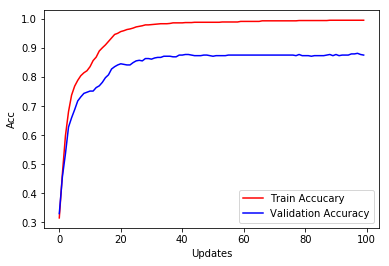

In [65]:
# we could have done this ourselves,
# but we should be aware of sklearn and it's tools
from sklearn.metrics import accuracy_score

# setting hyperparameters and gettings epoch sizes
batch_size = 100
num_epochs = 100
num_samples_train = x_train.shape[0]
num_batches_train = num_samples_train // batch_size
num_samples_valid = x_valid.shape[0]
num_batches_valid = num_samples_valid // batch_size

# setting up lists for handling loss/accuracy
train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
cur_loss = 0
losses = []

get_slice = lambda i, size: range(i * size, (i + 1) * size)

for epoch in range(num_epochs):
    # Forward -> Backprob -> Update params
    ## Train
    cur_loss = 0
    net.train()
    for i in range(num_batches_train):
        slce = get_slice(i, batch_size)
        x_batch = Variable(torch.from_numpy(x_train[slce]))
        output = net(x_batch)
        
        # compute gradients given loss
        target_batch = Variable(torch.from_numpy(targets_train[slce]).long())
        batch_loss = criterion(output, target_batch)
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
        
        cur_loss += batch_loss   
    losses.append(cur_loss / batch_size)

    net.eval()
    ### Evaluate training
    train_preds, train_targs = [], []
    for i in range(num_batches_train):
        slce = get_slice(i, batch_size)
        x_batch = Variable(torch.from_numpy(x_train[slce]))
        
        output = net(x_batch)
        preds = torch.max(output, 1)[1]
        
        train_targs += list(targets_train[slce])
        train_preds += list(preds.data.numpy())
    
    ### Evaluate validation
    val_preds, val_targs = [], []
    for i in range(num_batches_valid):
        slce = get_slice(i, batch_size)
        x_batch = Variable(torch.from_numpy(x_valid[slce]))
        
        output = net(x_batch)
        preds = torch.max(output, 1)[1]
        val_preds += list(preds.data.numpy())
        val_targs += list(targets_valid[slce])

    train_acc_cur = accuracy_score(train_targs, train_preds)
    valid_acc_cur = accuracy_score(val_targs, val_preds)
    
    train_acc.append(train_acc_cur)
    valid_acc.append(valid_acc_cur)
    
    if epoch % 10 == 0:
        print("Epoch %2i : Train Loss %f , Train acc %f, Valid acc %f" % (
                epoch+1, losses[-1], train_acc_cur, valid_acc_cur))

epoch = np.arange(len(train_acc))
plt.figure()
plt.plot(epoch, train_acc, 'r', epoch, valid_acc, 'b')
plt.legend(['Train Accucary','Validation Accuracy'])
plt.xlabel('Updates'), plt.ylabel('Acc')

# CNN - Hands On

In [66]:
import torch
print(torch.__version__)

1.0.1


In [67]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Assignment 1


### Assignment 1.2: Output dimensionality

Given the following 3D tensor input `(channel, height, width)` , a given amount (`channels_out`) of filters `(channels_in, filter_height, filter_width)`, stride `(height, width)` and padding `(height, width)`, calculate the output dimensionality if it's valid.

1. input tensor with dimensionality (1, 28, 28) and 16 filters of size (1, 5, 5) with stride (1, 1) and padding (0, 0)
 * **Answer:** (16, 24, 24)
2. input tensor with dimensionality (3, 32, 32) and 24 filters of size (2, 3, 3) with stride (1, 1) and padding (0, 0)
 * **Answer:** (channel number does not match)
3. input tensor with dimensionality (10, 32, 32) and 3 filters of size (10, 2, 2) with stride (2, 2) and padding (0, 0)
 * **Answer:** (3, 16, 16)
4. input tensor with dimensionality (11, 8, 16) and 7 filters of size (11, 3, 3) with stride (2, 2) and padding (1, 1)
 * **Answer:** (7, 4, 8)
5. input tensor with dimensionality (128, 256, 256) and 112 filters of size (128, 3, 3) with stride (1, 1) and padding (1, 1)
 * **Answer:** (112, 256, 256)
 

In [ ]:
import wget
wget.download('https://github.com/maximai/placeholder_repo/raw/master/mnist.npz')

In [68]:
## LOAD the mnist data
# To speed up training we'll only work on a subset of the data.
# Note that we reshape the data from 
#  (nsamples, num_features) = (nsamples, nchannels*rows*cols)
#    -> (nsamples, nchannels, rows, cols)
# in order to retain the spatial arrangements of the pixels

data = np.load('mnist.npz')
num_classes = 10

# define the number of (image) channels and rows, cols
nchannels, rows, cols = 1, 28, 28
#get the xtraining dataset 
x_train = data['X_train'][:1000].astype('float32')
x_train = x_train.reshape((-1, nchannels, rows, cols))
targets_train = data['y_train'][:1000].astype('int32')

# validation 
x_valid = data['X_valid'][:500].astype('float32')
x_valid = x_valid.reshape((-1, nchannels, rows, cols))
targets_valid = data['y_valid'][:500].astype('int32')

# test 
x_test = data['X_test'][:500].astype('float32')
x_test = x_test.reshape((-1, nchannels, rows, cols))
targets_test = data['y_test'][:500].astype('int32')

print("Information on dataset")
print("x_train", x_train.shape)

print("targets_train", targets_train.shape)
print("x_valid", x_valid.shape)

print("targets_valid", targets_valid.shape)
print("x_test", x_test.shape)

print("targets_test", targets_test.shape)

Information on dataset
x_train (1000, 1, 28, 28)
targets_train (1000,)
x_valid (500, 1, 28, 28)
targets_valid (500,)
x_test (500, 1, 28, 28)
targets_test (500,)


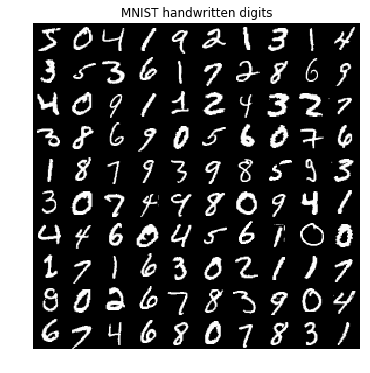

In [69]:
import matplotlib.pyplot as plt

#plot a few MNIST examples
idx, dim, classes = 0, 28, 10

# create empty canvas
canvas = np.zeros((dim*classes, classes*dim))

# fill with tensors
for i in range(classes):
    for j in range(classes):
        canvas[i*dim:(i+1)*dim, j*dim:(j+1)*dim] = x_train[idx].reshape((dim, dim))
        idx += 1
        
# visualize matrix of tensors as gray scale image
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(canvas, cmap='gray')
plt.title('MNIST handwritten digits')
plt.show()

In [70]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init

# note that when you import from torch.nn you don't have to define and initialize
# the W1, b1, W2, b2, ..., Wn, bn weights 

from torch.nn import Linear, Conv2d, BatchNorm2d, MaxPool2d, Dropout2d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax

In [71]:
# hyperameters of the model
num_classes = 10

# channels here represent the depth of image (grayscale image)
channels = x_train.shape[1]
height = x_train.shape[2]
width = x_train.shape[3]

print(x_train.shape)
print(channels, height, width)

(1000, 1, 28, 28)
1 28 28


In [76]:
def compute_conv_dim(dim_size, kernel_size, padding, stride):
    return int((dim_size - kernel_size + 2 * padding) / stride + 1)

In [77]:
def train(net, optimizer, num_epochs):          
    train_acc, train_loss = [], []
    valid_acc, valid_loss = [], []
    test_acc, test_loss = [], []
    cur_loss = 0
    losses = []
    
    # at each batch get appropiate slice of the x_train data 
    get_slice = lambda i, size: range(i * size, (i + 1) * size)

    for epoch in range(num_epochs):
        # Forward -> Backprob -> Update params
        ## Train
        cur_loss = 0

        # set the module in training mode
        net.train()        
        #*****************************************************
        for i in range(num_batches_train):
            slce = get_slice(i, batch_size)
            x_batch = Variable(torch.from_numpy(x_train[slce]))
            # forward pass 
            output = net(x_batch)
            # compute gradients given loss
            target_batch = Variable(torch.from_numpy(targets_train[slce]).long())
            batch_loss = criterion(output, target_batch)
            # zero gradient + backpropogate 
            optimizer.zero_grad()
            batch_loss.backward()
            # update the gradient 
            optimizer.step()
            # update current loss 
            cur_loss += batch_loss   
            
        losses.append(cur_loss / batch_size)    
        # set the module in evaluation mode 
        net.eval()
        train_preds, train_targs = [], []
        
        #*****************************************************
        for i in range(num_batches_train):
            slce = get_slice(i, batch_size)
            x_batch = Variable(torch.from_numpy(x_train[slce]))
            # forward pass using the updated NN model 
            output = net(x_batch)
            preds = torch.max(output, 1)[1]
            # collect train targets 
            # collect train predicts 
            train_targs += list(targets_train[slce])
            train_preds += list(preds.data.numpy())
            
        ### Evaluate validation
        #*****************************************************
        val_preds, val_targs = [], []    
        for i in range(num_batches_valid):
            slce = get_slice(i, batch_size)
            x_batch = Variable(torch.from_numpy(x_valid[slce]))
            # forward pass validation dataset using the optimal model
            # (no update applied)
            output = net(x_batch)
            preds = torch.max(output, 1)[1]            
            val_preds += list(preds.data.numpy())
            val_targs += list(targets_valid[slce])
        train_acc_cur = accuracy_score(train_targs, train_preds)
        valid_acc_cur = accuracy_score(val_targs, val_preds)

        train_acc.append(train_acc_cur)
        valid_acc.append(valid_acc_cur)
        if epoch % 10 == 0:
            print("Epoch %2i : Train Loss %f , Train acc %f, Valid acc %f" % (
                    epoch+1, losses[-1], train_acc_cur, valid_acc_cur))
            
    epoch = np.arange(len(train_acc))
    plt.figure()
    plt.plot(epoch, train_acc, 'r', epoch, valid_acc, 'b')
    plt.legend(['Train Acc', 'Val Acc'])
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    ### Evaluate test set
    x_batch = Variable(torch.from_numpy(x_test))
    output = net(x_batch)
    preds = torch.max(output, 1)[1]
    print("\nTest set Acc:  %f" % (accuracy_score(list(targets_test), list(preds.data.numpy()))))

In [78]:
from IPython.core.debugger import set_trace

In [79]:
class Conv2MaxPoolNet(nn.Module):       
    def __init__(self, channels, 
                 num_filters_1, 
                 num_filters_2, 
                 kernel_size_1, 
                 kernel_size_2, 
                 padding=0, 
                 stride=1, 
                 max_pool_size=2, 
                 max_pool_stride=2):
        
        super(Conv2MaxPoolNet, self).__init__()
        
        self.conv_1 = Conv2d(in_channels=channels,
                            out_channels=num_filters_1,
                            kernel_size=kernel_size_1,
                            stride=stride,
                            padding=padding)        
        
        self.conv_2 = Conv2d(in_channels=num_filters_1,
                            out_channels=num_filters_2,
                            kernel_size=kernel_size_2,
                            stride=stride,
                            padding=padding)        

        # you can define one maxpool and use it to pool any sequence of convolutional layers 
        self.max_pool = MaxPool2d(kernel_size=max_pool_size, stride=max_pool_stride)
        
        # NOTE: HEIGHT = HEIGHT/MAXPOOL_SIZE
        self.conv_out_height = int(compute_conv_dim(height, kernel_size_1, padding, stride)/max_pool_size)
        self.conv_out_width = int(compute_conv_dim(width, kernel_size_1, padding, stride)/max_pool_size)
        
        #Calculate the heigt and width again, based on the size of the first convolution layer
        self.conv_out_height = int(compute_conv_dim(self.conv_out_height, kernel_size_2, padding, stride)/max_pool_size)
        self.conv_out_width = int(compute_conv_dim(self.conv_out_width, kernel_size_2, padding, stride)/max_pool_size)    
        
        self.l1_in_features = num_filters_2 * self.conv_out_height * self.conv_out_width
        
        # fully connected 1st hidden layer 
        self.l_1 = Linear(in_features=self.l1_in_features,out_features=num_l1,bias=True)
        
        # fully connected output layer 
        self.l_out = Linear(in_features=num_l1, out_features=num_classes,bias=False)    
        self.n=0
        self.dropout = nn.Dropout2d(p=0.2)
        
    def forward(self, x): # x.size() = [batch, channel, height, width]
        #x = x.cuda()        
        if self.n < 1 : print(x.size())
        x = relu(self.max_pool(self.conv_1(x)))        
        """
        Conv2d, BatchNorm2d, MaxPool2d, Dropout2d
        relu, elu, relu6, sigmoid, tanh, softmax
        """        
        # set_trace()        
        
        if self.n < 1 : print(x.size())
        x = relu(self.max_pool(self.conv_2(x)))          
        x = self.dropout(x)
        
        if self.n < 1 : print(x.size())
        x = x.view(-1, self.l1_in_features)        
        #x = self.dropout(relu(self.l_1(x)))

        if self.n < 1 : print(x.size())
        x = relu(self.l_1(x))                
        
        self.n += 1
        if self.n < 1 : print(x.size())            
        x = softmax(self.l_out(x), dim =1)        
        if self.n < 1 : print(x.size())
            
        return x

torch.Size([100, 1, 28, 28])
torch.Size([100, 16, 14, 14])
torch.Size([100, 10, 7, 7])
torch.Size([100, 490])
Epoch  1 : Train Loss 0.229049 , Train acc 0.256000, Valid acc 0.270000
Epoch 11 : Train Loss 0.168918 , Train acc 0.784000, Valid acc 0.706000
Epoch 21 : Train Loss 0.166344 , Train acc 0.800000, Valid acc 0.742000
Epoch 31 : Train Loss 0.165845 , Train acc 0.803000, Valid acc 0.738000
Epoch 41 : Train Loss 0.165342 , Train acc 0.808000, Valid acc 0.752000
Epoch 51 : Train Loss 0.158639 , Train acc 0.873000, Valid acc 0.810000
Epoch 61 : Train Loss 0.156252 , Train acc 0.899000, Valid acc 0.838000
Epoch 71 : Train Loss 0.147747 , Train acc 0.987000, Valid acc 0.914000
Epoch 81 : Train Loss 0.147331 , Train acc 0.990000, Valid acc 0.928000
Epoch 91 : Train Loss 0.147169 , Train acc 0.990000, Valid acc 0.920000

Test set Acc:  0.946000
training time = 102.7 s


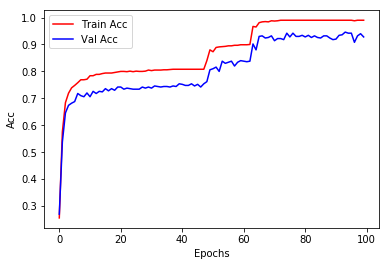

In [80]:
import time 
conv2maxpoolnet = Conv2MaxPoolNet(channels=channels, 
                                  num_filters_1=16, 
                                  num_filters_2=10, 
                                  kernel_size_1=5, 
                                  kernel_size_2=5, 
                                  padding=2)#.cuda()

t = time.time()
train(conv2maxpoolnet, 
      optim.Adam(conv2maxpoolnet.parameters(), lr=0.001), 
      num_epochs=100)

print("training time = %0.1f s"%(time.time()-t))

# Visualization of filters
Convolution filters can be interpreted as spatial feature detectors picking up different image features such as edges, corners etc. Below we provide code for visualization of the filters. The best results are obtained with fairly large filters of size 9 and either 16 or 36 filters. 

In [81]:
# to start with we print the names of the weights in our network
names_and_vars = {x[0]: x[1] for x in conv2maxpoolnet.named_parameters()}
print(names_and_vars.keys())


dict_keys(['conv_1.weight', 'conv_1.bias', 'conv_2.weight', 'conv_2.bias', 'l_1.weight', 'l_1.bias', 'l_out.weight'])


In [82]:
print(names_and_vars['l_1.weight'])
print(names_and_vars['l_1.weight'].shape)

Parameter containing:
tensor([[-0.0216,  0.0021,  0.0367,  ...,  0.0114,  0.0279, -0.0561],
        [-0.0247, -0.0082,  0.0105,  ..., -0.0344,  0.0176, -0.0423],
        [ 0.0269, -0.0174, -0.0343,  ..., -0.0215, -0.0407,  0.0431],
        ...,
        [-0.0300, -0.0547, -0.0802,  ...,  0.0151,  0.0082, -0.0323],
        [ 0.0052, -0.0658, -0.0633,  ..., -0.0110, -0.0177, -0.0292],
        [-0.0440, -0.0732, -0.0131,  ...,  0.0225,  0.0216,  0.0354]],
       requires_grad=True)
torch.Size([512, 490])


(16, 1, 5, 5) i.e. the shape is (channels_out, channels_in, filter_height, filter_width)
learned filter values


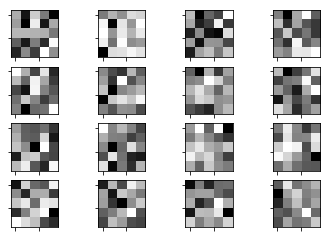

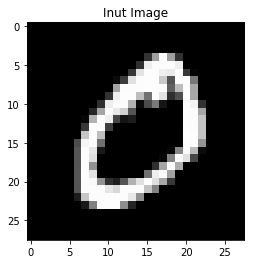

Response from input image convolved with the filters


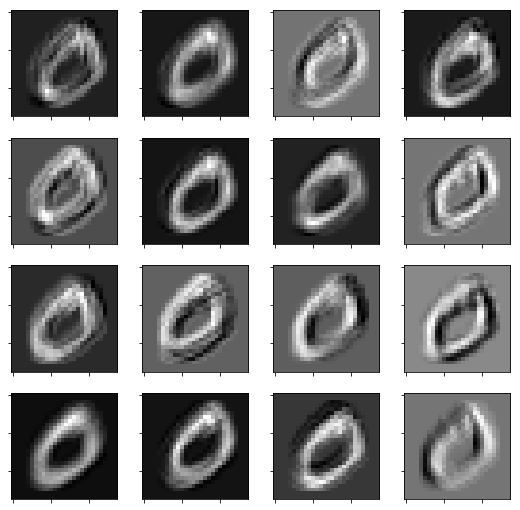

In [83]:
### ERROR - If you get a key error, 
#   then you need to define l_conv1 in your model!
if not 'conv_1.weight' in names_and_vars:
    print("You need to go back and define a convolutional layer in the network.")
else:
    
    # get the filter values from the first conv layer
    np_W = names_and_vars['conv_1.weight'].data.numpy()     
    print(np_W.shape, "i.e. the shape is (channels_out, channels_in, filter_height, filter_width)")    
    channels_out, channels_in, filter_size, _ = np_W.shape
    
    n = int(channels_out**0.5)

    # reshaping the last dimension to be n by n
    np_W_res = np_W.reshape(filter_size, filter_size, channels_in, n, n)
    fig, ax = plt.subplots(n,n)
    
    print("learned filter values")
    for i in range(n):
        for j in range(n):
            ax[i,j].imshow(np_W_res[:,:,0,i,j], cmap='gray',interpolation='none')
            ax[i,j].xaxis.set_major_formatter(plt.NullFormatter())
            ax[i,j].yaxis.set_major_formatter(plt.NullFormatter())

    idx = 1
    plt.figure()
    plt.imshow(x_train[idx,0],cmap='gray',interpolation='none')
    plt.title('Inut Image')
    plt.show()

    #visalize the filters convolved with an input image
    from scipy.signal import convolve2d
    np_W_res = np_W.reshape(filter_size, filter_size, channels_in, n, n)
    fig, ax = plt.subplots(n,n,figsize=(9,9))
    print("Response from input image convolved with the filters")
    
    for i in range(n):
        for j in range(n):
            ax[i,j].imshow(convolve2d(x_train[1,0],np_W_res[:,:,0,i,j], mode='same'),
                           cmap='gray',interpolation='none')
            ax[i,j].xaxis.set_major_formatter(plt.NullFormatter())
            ax[i,j].yaxis.set_major_formatter(plt.NullFormatter())